In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values

In [5]:
missing_values=data.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#fill missing values

In [10]:
age_fill=data['Age'].mean()
data['Age'].fillna(age_fill)

embarked_fill=data['Embarked'].mode()
data['Embarked']=data['Embarked'].fillna(embarked_fill)

cabin_fill = data['Cabin'].mode()
data['Cabin'] = data['Cabin'].fillna(cabin_fill)

data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Find Duplicate Values

In [11]:
duplicate_values=data.duplicated().sum()
duplicate_values

0

**EDA**

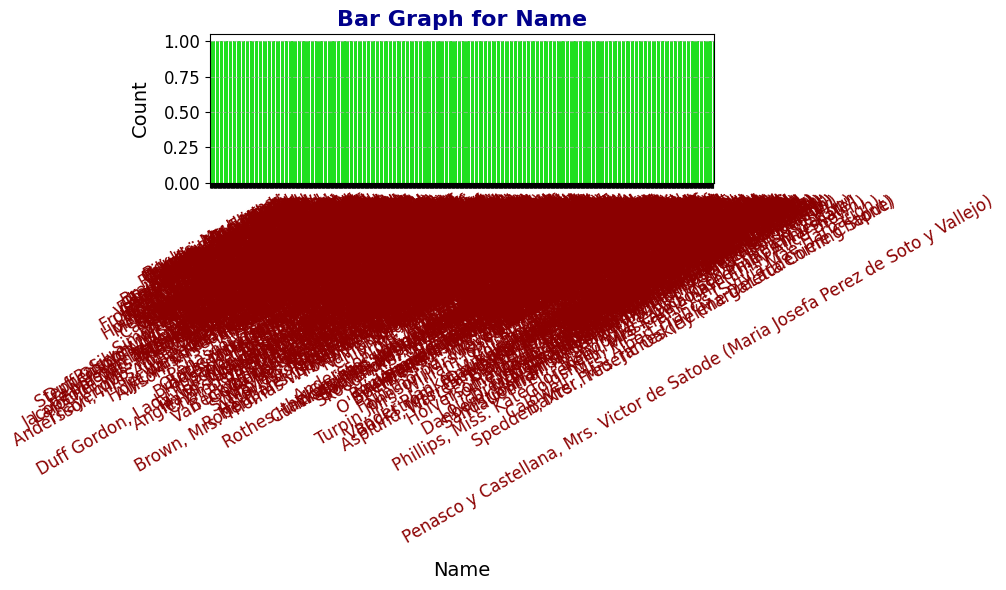

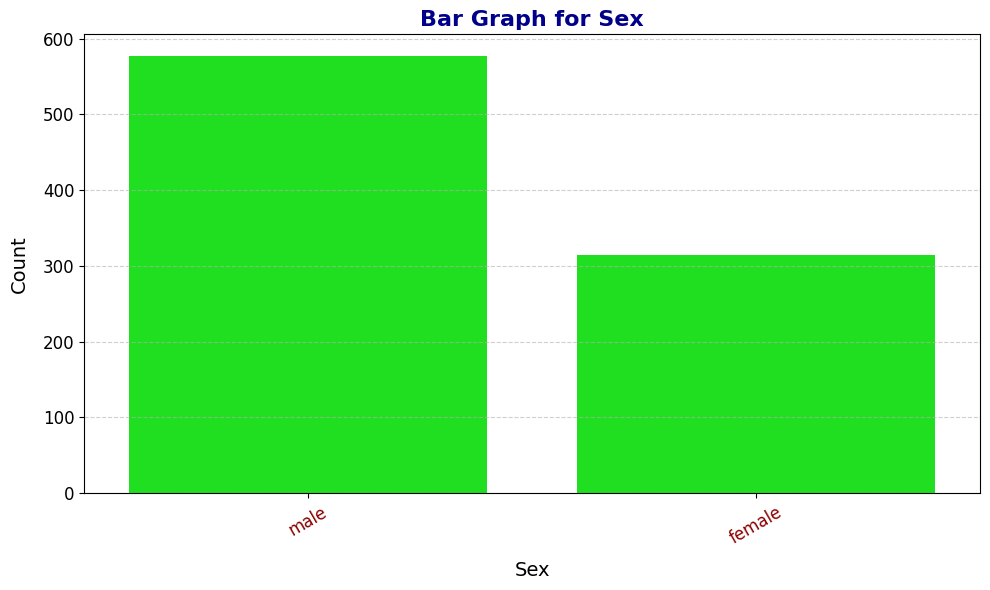

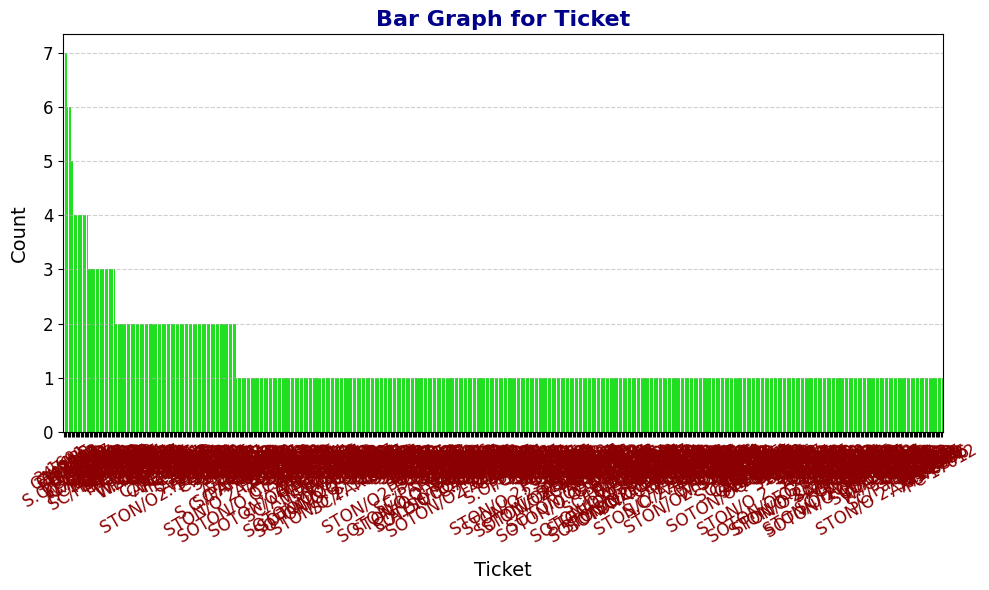

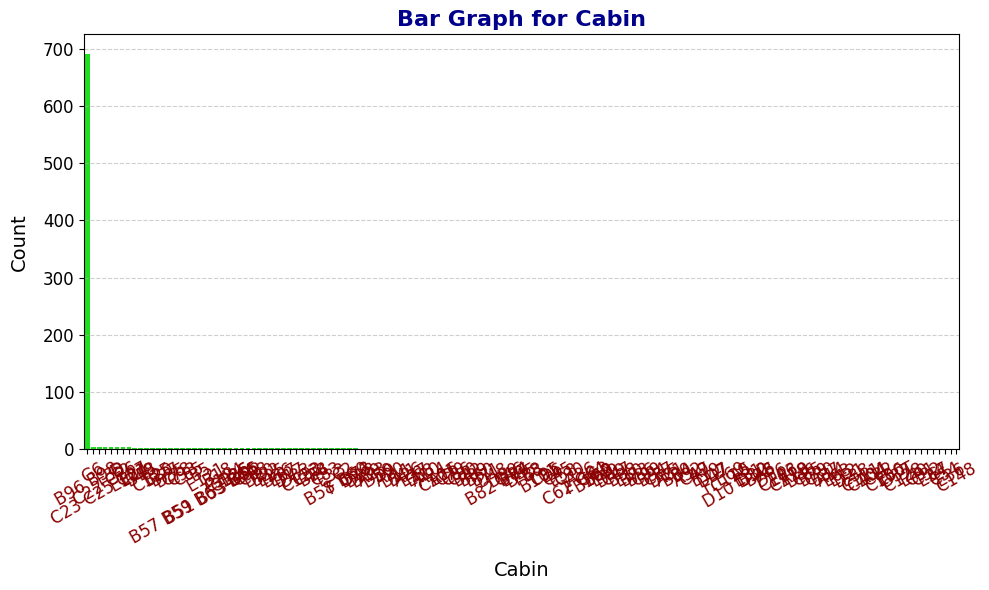

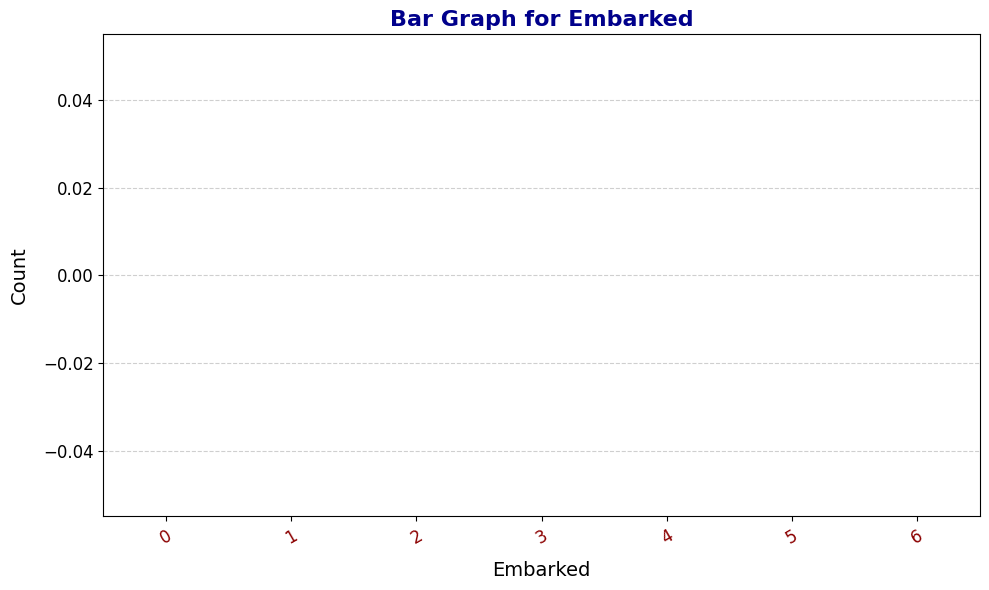

In [27]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index,  color='lime')
    plt.title(f'Bar Graph for {col}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=14, labelpad=10)
    plt.ylabel('Count', fontsize=14, labelpad=10)
    plt.xticks(fontsize=12, rotation=30, color='darkred')
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

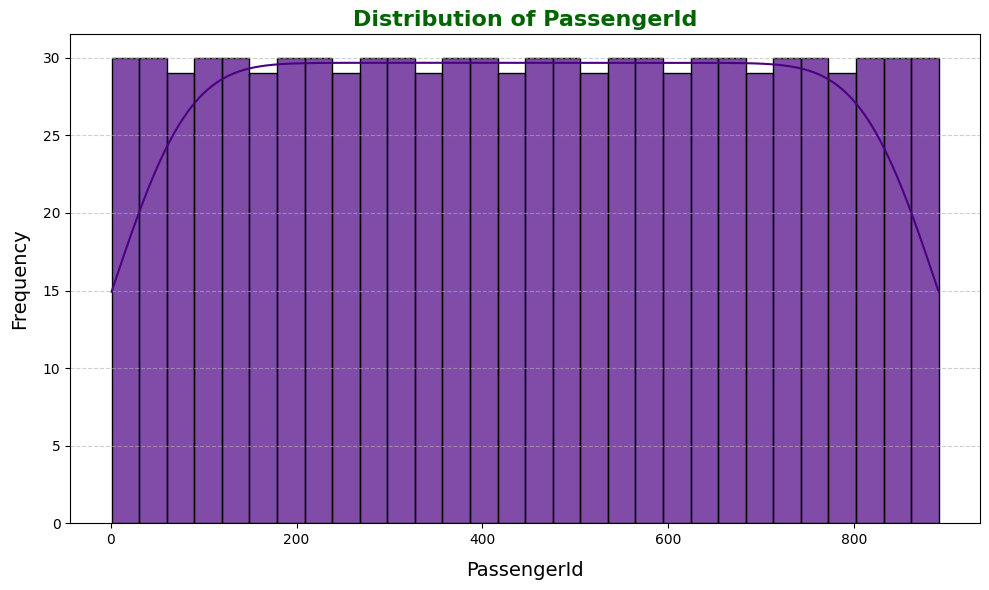

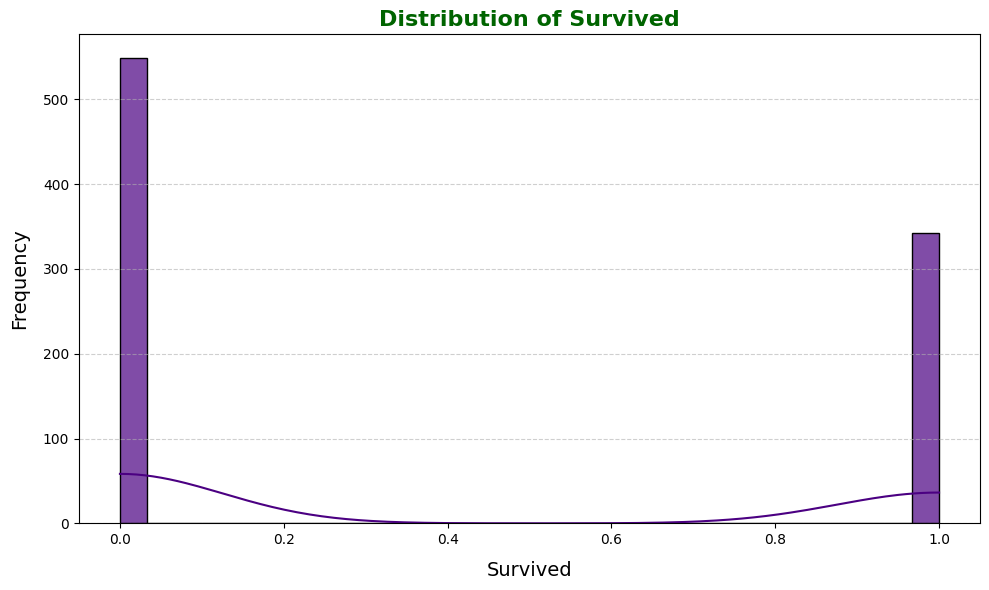

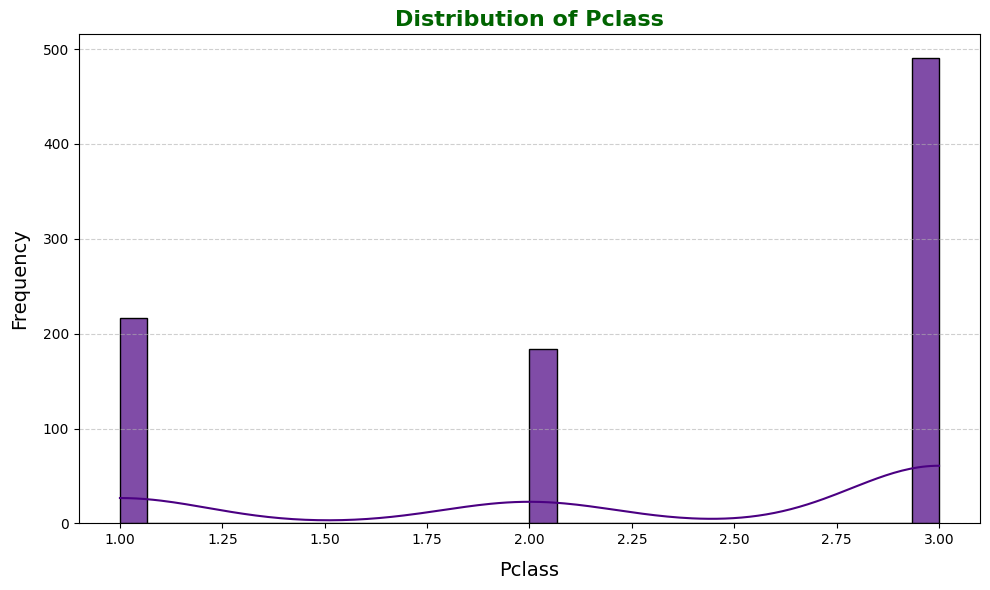

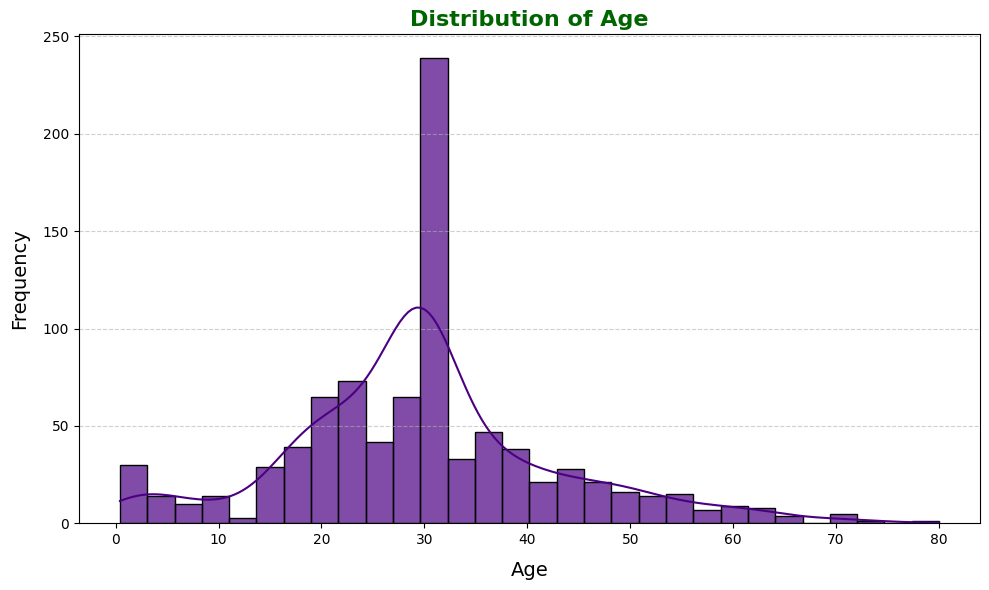

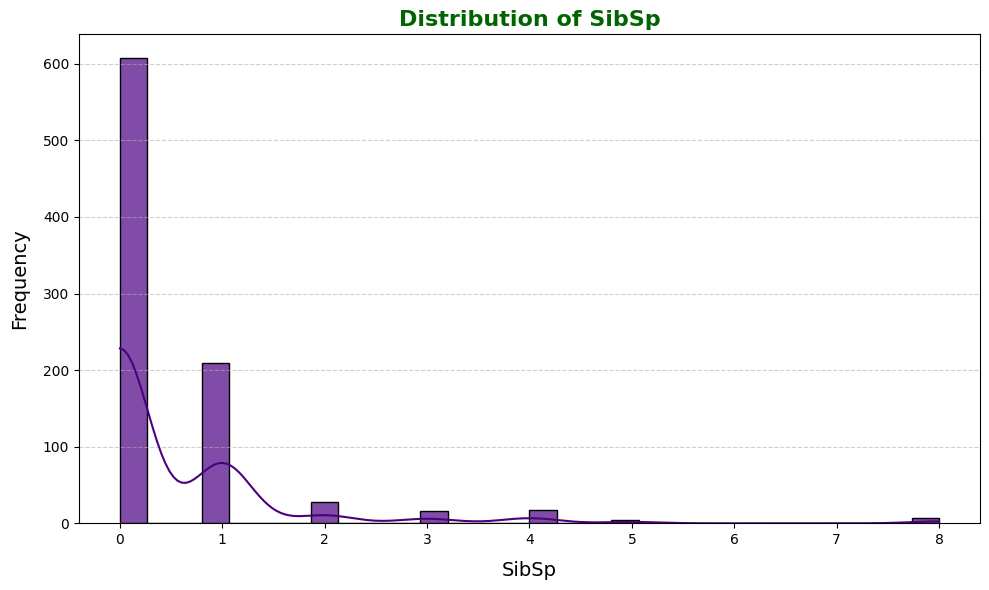

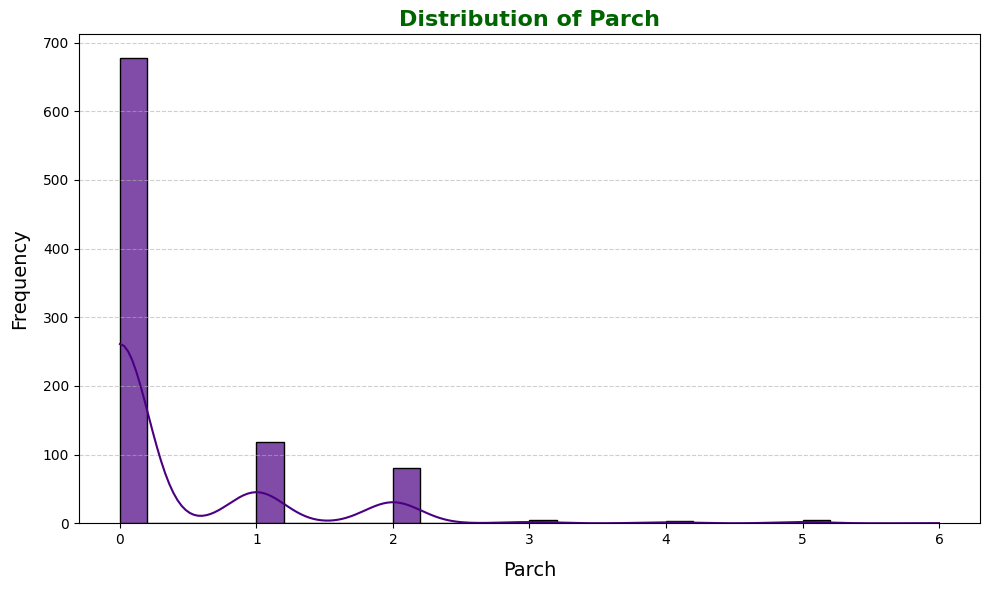

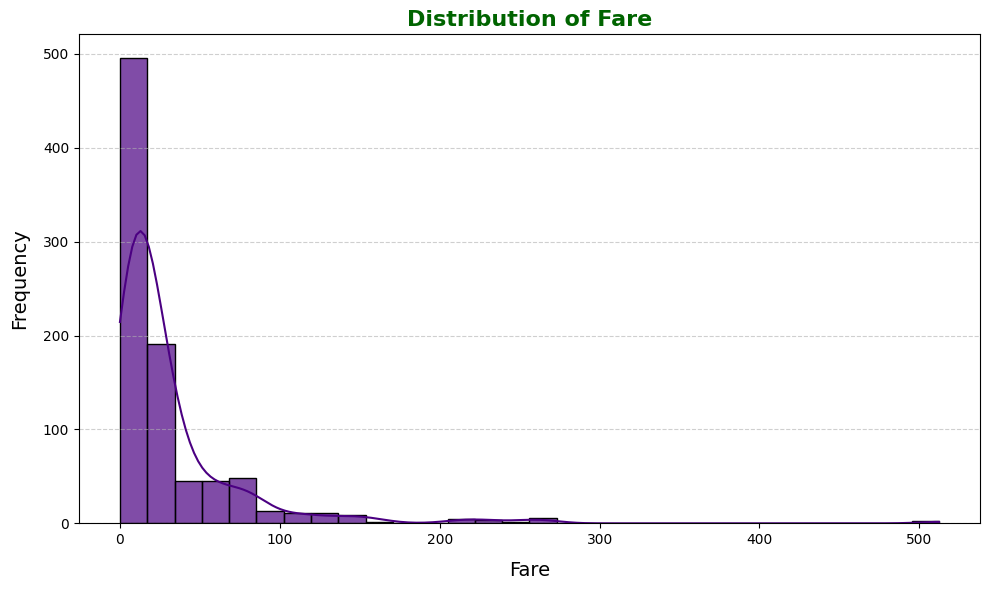

In [22]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='indigo', bins=30, alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', color='darkgreen')
    plt.xlabel(col, fontsize=14, labelpad=10)
    plt.ylabel('Frequency', fontsize=14, labelpad=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

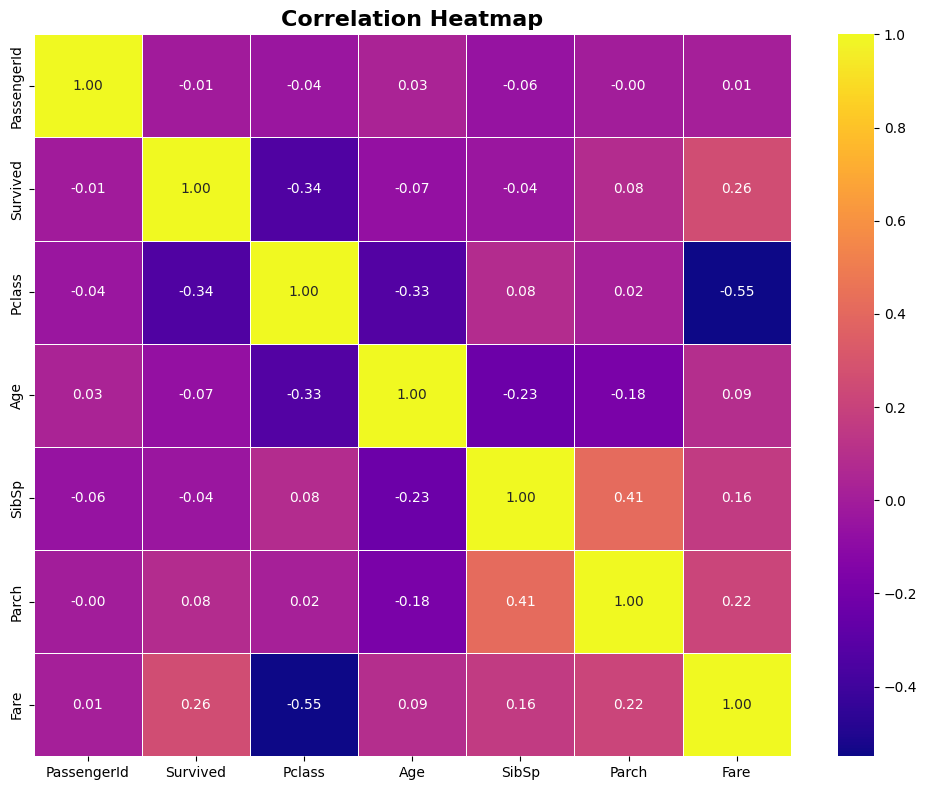

In [29]:
correlation_matrix = data.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summarize Insights :

1.  **Missing Data:** The dataset contains missing values, primarily in 'Age', 'Cabin', and 'Embarked' columns. These were filled using mean/mode imputation.  

2.  **Categorical Feature Distributions:** Visualizations reveal the distribution of categorical features like 'Sex', 'Embarked', and 'Pclass'.

3.  **Numerical Feature Distributions:** Histograms show the distributions of numerical features like 'Age', 'Fare', and 'SibSp'.

4.  **Correlation Analysis:** The correlation heatmap reveals relationships between numerical features.
